In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer 

## 1. Загрузите датасет 20 newsgroups;

In [ ]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

## 2. Познакомьтесь с описанием и структурой датасета.

In [4]:
train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

## 3. Выведите информацию о количественных параметрах датасета;


In [5]:
test.target.shape[0], train.target.shape[0] 

(7532, 11314)

## 4. Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной);


In [6]:
test.target, test.data[10]

(array([ 7,  5,  0, ...,  9,  6, 15]),
 'From: Greg.Reinacker@FtCollins.NCR.COM\nSubject: Windows On-Line Review uploaded\nReply-To: Greg.Reinacker@FtCollinsCO.NCR.COM\nOrganization: NCR Microelectronics, Ft. Collins, CO\nLines: 12\n\nI have uploaded the Windows On-Line Review shareware edition to\nftp.cica.indiana.edu as /pub/pc/win3/uploads/wolrs7.zip.\n\nIt is an on-line magazine which contains reviews of some shareware\nproducts...I grabbed it from the Windows On-Line BBS.\n\n--\n--------------------------------------------------------------------------\nGreg Reinacker                          (303) 223-5100 x9289\nNCR Microelectronic Products Division   VoicePlus 464-9289\n2001 Danfield Court                     Greg.Reinacker@FtCollinsCO.NCR.COM\nFort Collins, CO  80525\n')

In [7]:
train.target[10:20], train.data[18]

(array([ 8, 19,  4, 14,  6,  0,  1,  7, 12,  5]),
 'From: ritley@uimrl7.mrl.uiuc.edu ()\nSubject: SEEKING THERMOCOUPLE AMPLIFIER CIRCUIT\nReply-To: ritley@uiucmrl.bitnet ()\nOrganization: Materials Research Lab\nLines: 17\n\n\n\nI would like to be able to amplify a voltage signal which is\noutput from a thermocouple, preferably by a factor of\n100 or 1000 ---- so that the resulting voltage can be fed\nmore easily into a personal-computer-based ADC data\nacquisition card.\n\nMight anyone be able to point me to references to such\ncircuits?  I have seen simple amplifier circuits before, but\nI am not sure how well they work in practice.\n\nIn this case, I\'d like something which will amplify sufficiently\n"nicely" to be used for thermocouples (say, a few degrees\naccuracy or better).\n\nAny pointers would be greatly appreciated!\n')

## 5.Разделите эти данные на тестовую и обучающую выборки;


In [8]:
# Разделил данные в первом пункте задания

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split()


## 6.Постройте модель наивного байесовского для классификации текстов;

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train.data) #1
model = MultinomialNB().fit(X_train, train.target)


In [10]:
X_test = vectorizer.transform(test.data)
y_test_predict = model.predict(X_test)


## 7.Оцените качество модели на тестовой выборке с помощью следующих метрик:
- достоверность предсказания (accuracy);
- точность (precision);
- полнота (recall);


In [11]:
print(metrics.classification_report(test.target, y_test_predict, zero_division=1))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       319
           1       0.67      0.74      0.70       389
           2       0.20      0.00      0.01       394
           3       0.56      0.77      0.65       392
           4       0.84      0.75      0.79       385
           5       0.65      0.84      0.73       395
           6       0.93      0.65      0.77       390
           7       0.87      0.91      0.89       396
           8       0.96      0.92      0.94       398
           9       0.96      0.87      0.91       397
          10       0.93      0.96      0.95       399
          11       0.67      0.95      0.78       396
          12       0.79      0.66      0.72       393
          13       0.87      0.82      0.85       396
          14       0.83      0.89      0.86       394
          15       0.70      0.96      0.81       398
          16       0.69      0.91      0.79       364
          17       0.85    

## 8.Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.


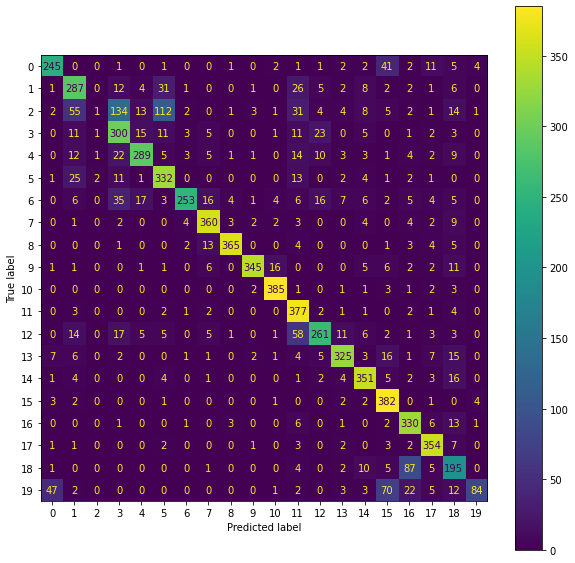

In [22]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

matrix_display = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(test.target, y_test_predict)).plot()
matrix_display;

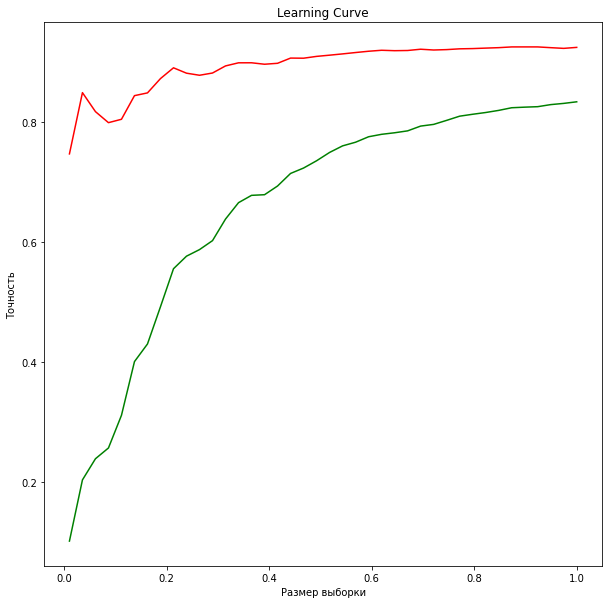

In [43]:
import numpy as np
from sklearn.model_selection import learning_curve

size_grid = np.linspace(0.01, 1.0, 40)

_, train_scores, test_scores = learning_curve(MultinomialNB(), X_train, train.target, train_sizes=size_grid, cv=5)

plt.figure()
plt.plot(size_grid, np.average(train_scores, axis=1), color='red')
plt.plot(size_grid, np.average(test_scores, axis=1), color='green')
plt.title('Learning Curve')
plt.xlabel('Размер выборки')
plt.ylabel('Точность')
plt.show()


## 9.Сделайте вывод о применимости модели

In [ ]:
# Модель точна на 75%